In [14]:
import numpy as np
import scipy.stats
import statistics
import matplotlib.pyplot as plt
import matplotlib
import control

Continous time state space system

In [15]:
A = [[0, 1, 0], [0, 0, 9.74], [0, 0, -1/0.051]]
B = [[0], [0], [1/0.051]]
C = [[1, 0, 0]]
D = [[0]]
Ts = 0.05

In [16]:
sys = control.ss(A, B, C, D)

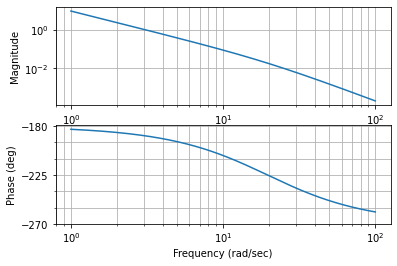

In [6]:
mag, phase, omega = control.bode_plot(sys)

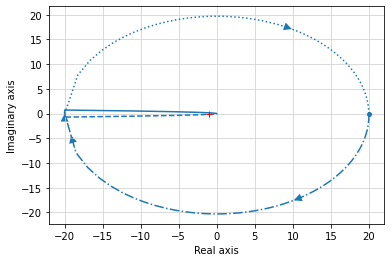

In [7]:
count = control.nyquist_plot(sys)

In [17]:
print(control.poles(sys))
print(control.zeros(sys))

[  0.        +0.j   0.        +0.j -19.60784314+0.j]
[]


Discretisation

In [18]:
dsys = control.sample_system(sys, Ts, method='euler')
print(dsys.A)
print(dsys.B)
print(dsys.C)

[[1.         0.05       0.        ]
 [0.         1.         0.487     ]
 [0.         0.         0.01960784]]
[[0.        ]
 [0.        ]
 [0.98039216]]
[[1. 0. 0.]]


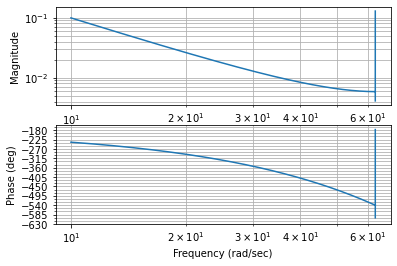

In [10]:
mag, phase, omega = control.bode_plot(dsys)

In [11]:
count = control.nyquist_plot(dsys)

System with noise:

$x_{n+1} = A x_{n} + B u_{n} +G w_{n}$

$y_n = C x_n + v_n$

$E w w' = QN \; Evv' = RN$

Kalman filter is:

$ \widetilde{x}_{n+1} = A \widetilde{x}_n + B u_n + L(y_n - C\widetilde{x}_n) $

$ \widetilde{x}_{n+1} = (A - LC) \widetilde{x}_n + B u_n + Ly_n $

In [28]:
L, P, E = control.dlqe(dsys.A, [[0],[0],[1]], dsys.C, 3, 5)
print(np.abs(E))
print("-----")
print(dsys.A-L*dsys.C)
print(dsys.B)
print(L)

[0.90651562 0.90651562 0.01960784]
-----
[[ 8.04330417e-01  5.00000000e-02  0.00000000e+00]
 [-3.48802796e-01  1.00000000e+00  4.87000000e-01]
 [-9.38335798e-08  0.00000000e+00  1.96078431e-02]]
[[0.        ]
 [0.        ]
 [0.98039216]]
[[1.95669583e-01]
 [3.48802796e-01]
 [9.38335798e-08]]


Text(0, 0.5, 'położenie serwomechanizmu, stopnie')

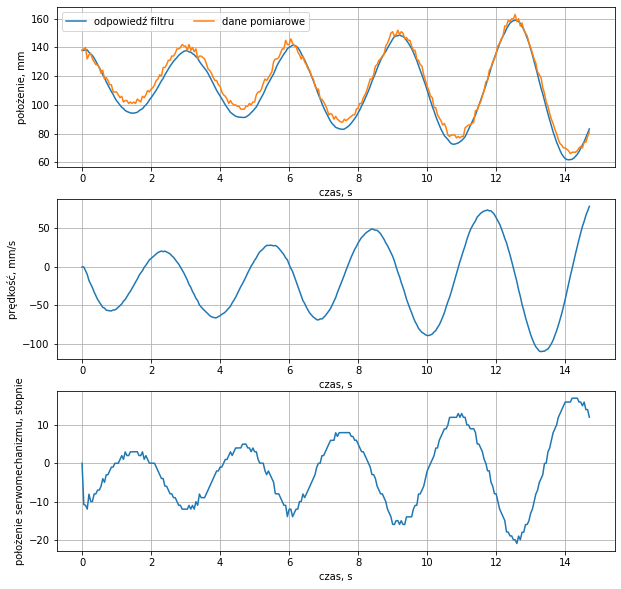

In [32]:
# P D Z X E PID_U U_0 U
data = np.array([[4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 136, -26, -10, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 142, -32, -12, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 135, -25, -10, 100, 100], [4, 0, 110, 143, -33, -13, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 136, -26, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 142, -32, -12, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 143, -33, -13, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 135, -25, -10, 100, 100], [4, 0, 110, 143, -33, -13, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 143, -33, -13, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 142, -32, -12, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 136, -26, -10, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 142, -32, -12, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 141, -31, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 143, -33, -13, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 137, -27, -10, 100, 100], [4, 0, 110, 140, -30, -12, 100, 100], [4, 0, 110, 138, -28, -11, 100, 100], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 137, -27, -10, 100, 110], [4, 0, 110, 138, -28, -11, 100, 111], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 135, -25, -10, 100, 110], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 130, -20, -8, 100, 108], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 122, -12, -4, 100, 104], [4, 0, 110, 124, -14, -5, 100, 105], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 119, -9, -3, 100, 103], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 114, -4, -1, 100, 101], [4, 0, 110, 114, -4, -1, 100, 101], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 107, 3, 1, 100, 99], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 106, 4, 1, 100, 99], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 104, 6, 2, 100, 98], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 106, 4, 1, 100, 99], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 107, 3, 1, 100, 99], [4, 0, 110, 110, 0, 0, 100, 100], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 112, -2, 0, 100, 100], [4, 0, 110, 114, -4, -1, 100, 101], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 120, -10, -4, 100, 104], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 131, -21, -8, 100, 108], [4, 0, 110, 131, -21, -8, 100, 108], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 142, -32, -12, 100, 112], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 138, -28, -11, 100, 111], [4, 0, 110, 142, -32, -12, 100, 112], [4, 0, 110, 138, -28, -11, 100, 111], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 137, -27, -10, 100, 110], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 133, -23, -9, 100, 109], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 129, -19, -7, 100, 107], [4, 0, 110, 125, -15, -6, 100, 106], [4, 0, 110, 124, -14, -5, 100, 105], [4, 0, 110, 122, -12, -4, 100, 104], [4, 0, 110, 119, -9, -3, 100, 103], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 114, -4, -1, 100, 101], [4, 0, 110, 113, -3, -1, 100, 101], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 107, 3, 1, 100, 99], [4, 0, 110, 106, 4, 1, 100, 99], [4, 0, 110, 104, 6, 2, 100, 98], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 97, 13, 5, 100, 95], [4, 0, 110, 97, 13, 5, 100, 95], [4, 0, 110, 97, 13, 5, 100, 95], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 107, 3, 1, 100, 99], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 115, -5, -2, 100, 102], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 119, -9, -3, 100, 103], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 123, -13, -5, 100, 105], [4, 0, 110, 130, -20, -8, 100, 108], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 133, -23, -9, 100, 109], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 139, -29, -11, 100, 111], [4, 0, 110, 145, -35, -14, 100, 114], [4, 0, 110, 142, -32, -12, 100, 112], [4, 0, 110, 142, -32, -12, 100, 112], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 143, -33, -13, 100, 113], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 137, -27, -10, 100, 110], [4, 0, 110, 135, -25, -10, 100, 110], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 130, -20, -8, 100, 108], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 125, -15, -6, 100, 106], [4, 0, 110, 124, -14, -5, 100, 105], [4, 0, 110, 120, -10, -4, 100, 104], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 113, -3, -1, 100, 101], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 104, 6, 2, 100, 98], [4, 0, 110, 104, 6, 2, 100, 98], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 97, 13, 5, 100, 95], [4, 0, 110, 93, 17, 6, 100, 94], [4, 0, 110, 94, 16, 6, 100, 94], [4, 0, 110, 93, 17, 6, 100, 94], [4, 0, 110, 90, 20, 8, 100, 92], [4, 0, 110, 92, 18, 7, 100, 93], [4, 0, 110, 90, 20, 8, 100, 92], [4, 0, 110, 89, 21, 8, 100, 92], [4, 0, 110, 88, 22, 8, 100, 92], [4, 0, 110, 88, 22, 8, 100, 92], [4, 0, 110, 90, 20, 8, 100, 92], [4, 0, 110, 89, 21, 8, 100, 92], [4, 0, 110, 90, 20, 8, 100, 92], [4, 0, 110, 91, 19, 7, 100, 93], [4, 0, 110, 92, 18, 7, 100, 93], [4, 0, 110, 93, 17, 6, 100, 94], [4, 0, 110, 93, 17, 6, 100, 94], [4, 0, 110, 97, 13, 5, 100, 95], [4, 0, 110, 98, 12, 4, 100, 96], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 107, 3, 1, 100, 99], [4, 0, 110, 110, 0, 0, 100, 100], [4, 0, 110, 114, -4, -1, 100, 101], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 127, -17, -6, 100, 106], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 131, -21, -8, 100, 108], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 135, -25, -10, 100, 110], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 143, -33, -13, 100, 113], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 150, -40, -16, 100, 116], [4, 0, 110, 151, -41, -16, 100, 116], [4, 0, 110, 148, -38, -15, 100, 115], [4, 0, 110, 149, -39, -15, 100, 115], [4, 0, 110, 152, -42, -16, 100, 116], [4, 0, 110, 149, -39, -15, 100, 115], [4, 0, 110, 151, -41, -16, 100, 116], [4, 0, 110, 150, -40, -16, 100, 116], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 147, -37, -14, 100, 114], [4, 0, 110, 145, -35, -14, 100, 114], [4, 0, 110, 145, -35, -14, 100, 114], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 138, -28, -11, 100, 111], [4, 0, 110, 138, -28, -11, 100, 111], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 131, -21, -8, 100, 108], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 127, -17, -6, 100, 106], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 113, -3, -1, 100, 101], [4, 0, 110, 110, 0, 0, 100, 100], [4, 0, 110, 106, 4, 1, 100, 99], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 98, 12, 4, 100, 96], [4, 0, 110, 98, 12, 4, 100, 96], [4, 0, 110, 93, 17, 6, 100, 94], [4, 0, 110, 91, 19, 7, 100, 93], [4, 0, 110, 89, 21, 8, 100, 92], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 87, 23, 9, 100, 91], [4, 0, 110, 84, 26, 10, 100, 90], [4, 0, 110, 79, 31, 12, 100, 88], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 79, 31, 12, 100, 88], [4, 0, 110, 79, 31, 12, 100, 88], [4, 0, 110, 79, 31, 12, 100, 88], [4, 0, 110, 77, 33, 13, 100, 87], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 77, 33, 13, 100, 87], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 84, 26, 10, 100, 90], [4, 0, 110, 85, 25, 10, 100, 90], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 87, 23, 9, 100, 91], [4, 0, 110, 88, 22, 8, 100, 92], [4, 0, 110, 96, 14, 5, 100, 95], [4, 0, 110, 96, 14, 5, 100, 95], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 106, 4, 1, 100, 99], [4, 0, 110, 110, 0, 0, 100, 100], [4, 0, 110, 116, -6, -2, 100, 102], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 124, -14, -5, 100, 105], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 130, -20, -8, 100, 108], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 143, -33, -13, 100, 113], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 148, -38, -15, 100, 115], [4, 0, 110, 155, -45, -18, 100, 118], [4, 0, 110, 155, -45, -18, 100, 118], [4, 0, 110, 159, -49, -19, 100, 119], [4, 0, 110, 158, -48, -19, 100, 119], [4, 0, 110, 160, -50, -20, 100, 120], [4, 0, 110, 160, -50, -20, 100, 120], [4, 0, 110, 163, -53, -21, 100, 121], [4, 0, 110, 158, -48, -19, 100, 119], [4, 0, 110, 160, -50, -20, 100, 120], [4, 0, 110, 155, -45, -18, 100, 118], [4, 0, 110, 157, -47, -18, 100, 118], [4, 0, 110, 152, -42, -16, 100, 116], [4, 0, 110, 150, -40, -16, 100, 116], [4, 0, 110, 148, -38, -15, 100, 115], [4, 0, 110, 143, -33, -13, 100, 113], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 129, -19, -7, 100, 107], [4, 0, 110, 123, -13, -5, 100, 105], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 119, -9, -3, 100, 103], [4, 0, 110, 112, -2, 0, 100, 100], [4, 0, 110, 108, 2, 0, 100, 100], [4, 0, 110, 102, 8, 3, 100, 97], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 94, 16, 6, 100, 94], [4, 0, 110, 90, 20, 8, 100, 92], [4, 0, 110, 87, 23, 9, 100, 91], [4, 0, 110, 83, 27, 10, 100, 90], [4, 0, 110, 80, 30, 12, 100, 88], [4, 0, 110, 76, 34, 13, 100, 87], [4, 0, 110, 73, 37, 14, 100, 86], [4, 0, 110, 72, 38, 15, 100, 85], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 69, 41, 16, 100, 84], [4, 0, 110, 68, 42, 16, 100, 84], [4, 0, 110, 66, 44, 17, 100, 83], [4, 0, 110, 67, 43, 17, 100, 83], [4, 0, 110, 67, 43, 17, 100, 83], [4, 0, 110, 67, 43, 17, 100, 83], [4, 0, 110, 68, 42, 16, 100, 84], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 71, 39, 15, 100, 85], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 74, 36, 14, 100, 86], [4, 0, 110, 74, 36, 14, 100, 86], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 81, 29, 11, 100, 89], [4, 0, 110, 85, 25, 10, 100, 90], [4, 0, 110, 89, 21, 8, 100, 92], [4, 0, 110, 94, 16, 6, 100, 94], [4, 0, 110, 98, 12, 4, 100, 96], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 108, 2, 0, 100, 100], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 120, -10, -4, 100, 104], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 135, -25, -10, 100, 110], [4, 0, 110, 142, -32, -12, 100, 112], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 151, -41, -16, 100, 116], [4, 0, 110, 151, -41, -16, 100, 116], [4, 0, 110, 156, -46, -18, 100, 118], [4, 0, 110, 160, -50, -20, 100, 120], [4, 0, 110, 168, -58, -23, 100, 123], [4, 0, 110, 172, -62, -24, 100, 124], [4, 0, 110, 166, -56, -22, 100, 122], [4, 0, 110, 169, -59, -23, 100, 123], [4, 0, 110, 167, -57, -22, 100, 122], [4, 0, 110, 172, -62, -24, 100, 124], [4, 0, 110, 170, -60, -24, 100, 124], [4, 0, 110, 171, -61, -24, 100, 124], [4, 0, 110, 170, -60, -24, 100, 124], [4, 0, 110, 165, -55, -22, 100, 122], [4, 0, 110, 166, -56, -22, 100, 122], [4, 0, 110, 164, -54, -21, 100, 121], [4, 0, 110, 157, -47, -18, 100, 118], [4, 0, 110, 156, -46, -18, 100, 118], [4, 0, 110, 154, -44, -17, 100, 117], [4, 0, 110, 149, -39, -15, 100, 115], [4, 0, 110, 145, -35, -14, 100, 114], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 131, -21, -8, 100, 108], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 108, 2, 0, 100, 100], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 92, 18, 7, 100, 93], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 82, 28, 11, 100, 89], [4, 0, 110, 79, 31, 12, 100, 88], [4, 0, 110, 74, 36, 14, 100, 86], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 68, 42, 16, 100, 84], [4, 0, 110, 66, 44, 17, 100, 83], [4, 0, 110, 64, 46, 18, 100, 82], [4, 0, 110, 60, 50, 20, 100, 80], [4, 0, 110, 56, 54, 21, 100, 79], [4, 0, 110, 60, 50, 20, 100, 80], [4, 0, 110, 56, 54, 21, 100, 79], [4, 0, 110, 54, 56, 22, 100, 78], [4, 0, 110, 56, 54, 21, 100, 79], [4, 0, 110, 57, 53, 21, 100, 79], [4, 0, 110, 55, 55, 22, 100, 78], [4, 0, 110, 59, 51, 20, 100, 80], [4, 0, 110, 61, 49, 19, 100, 81], [4, 0, 110, 60, 50, 20, 100, 80], [4, 0, 110, 63, 47, 18, 100, 82], [4, 0, 110, 69, 41, 16, 100, 84], [4, 0, 110, 68, 42, 16, 100, 84], [4, 0, 110, 72, 38, 15, 100, 85], [4, 0, 110, 76, 34, 13, 100, 87], [4, 0, 110, 81, 29, 11, 100, 89], [4, 0, 110, 85, 25, 10, 100, 90], [4, 0, 110, 87, 23, 9, 100, 91], [4, 0, 110, 95, 15, 6, 100, 94], [4, 0, 110, 98, 12, 4, 100, 96], [4, 0, 110, 104, 6, 2, 100, 98], [4, 0, 110, 110, 0, 0, 100, 100], [4, 0, 110, 117, -7, -2, 100, 102], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 128, -18, -7, 100, 107], [4, 0, 110, 133, -23, -9, 100, 109], [4, 0, 110, 137, -27, -10, 100, 110], [4, 0, 110, 143, -33, -13, 100, 113], [4, 0, 110, 150, -40, -16, 100, 116], [4, 0, 110, 159, -49, -19, 100, 119], [4, 0, 110, 164, -54, -21, 100, 121], [4, 0, 110, 165, -55, -22, 100, 122], [4, 0, 110, 169, -59, -23, 100, 123], [4, 0, 110, 179, -69, -27, 100, 127], [4, 0, 110, 182, -72, -28, 100, 128], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 185, -75, -30, 100, 130], [4, 0, 110, 185, -75, -30, 100, 130], [4, 0, 110, 193, -83, -33, 100, 133], [4, 0, 110, 192, -82, -32, 100, 132], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 185, -75, -30, 100, 130], [4, 0, 110, 190, -80, -32, 100, 132], [4, 0, 110, 187, -77, -30, 100, 130], [4, 0, 110, 181, -71, -28, 100, 128], [4, 0, 110, 181, -71, -28, 100, 128], [4, 0, 110, 181, -71, -28, 100, 128], [4, 0, 110, 175, -65, -26, 100, 126], [4, 0, 110, 169, -59, -23, 100, 123], [4, 0, 110, 166, -56, -22, 100, 122], [4, 0, 110, 155, -45, -18, 100, 118], [4, 0, 110, 152, -42, -16, 100, 116], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 141, -31, -12, 100, 112], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 124, -14, -5, 100, 105], [4, 0, 110, 123, -13, -5, 100, 105], [4, 0, 110, 114, -4, -1, 100, 101], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 100, 10, 4, 100, 96], [4, 0, 110, 96, 14, 5, 100, 95], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 83, 27, 10, 100, 90], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 67, 43, 17, 100, 83], [4, 0, 110, 63, 47, 18, 100, 82], [4, 0, 110, 57, 53, 21, 100, 79], [4, 0, 110, 54, 56, 22, 100, 78], [4, 0, 110, 49, 61, 24, 100, 76], [4, 0, 110, 48, 62, 24, 100, 76], [4, 0, 110, 45, 65, 26, 100, 74], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 38, 72, 28, 100, 72], [4, 0, 110, 40, 70, 28, 100, 72], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 40, 70, 28, 100, 72], [4, 0, 110, 39, 71, 28, 100, 72], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 46, 64, 25, 100, 75], [4, 0, 110, 51, 59, 23, 100, 77], [4, 0, 110, 52, 58, 23, 100, 77], [4, 0, 110, 55, 55, 22, 100, 78], [4, 0, 110, 61, 49, 19, 100, 81], [4, 0, 110, 66, 44, 17, 100, 83], [4, 0, 110, 71, 39, 15, 100, 85], [4, 0, 110, 74, 36, 14, 100, 86], [4, 0, 110, 80, 30, 12, 100, 88], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 91, 19, 7, 100, 93], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 116, -6, -2, 100, 102], [4, 0, 110, 121, -11, -4, 100, 104], [4, 0, 110, 127, -17, -6, 100, 106], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 138, -28, -11, 100, 111], [4, 0, 110, 147, -37, -14, 100, 114], [4, 0, 110, 152, -42, -16, 100, 116], [4, 0, 110, 160, -50, -20, 100, 120], [4, 0, 110, 173, -63, -25, 100, 125], [4, 0, 110, 179, -69, -27, 100, 127], [4, 0, 110, 181, -71, -28, 100, 128], [4, 0, 110, 189, -79, -31, 100, 131], [4, 0, 110, 195, -85, -34, 100, 134], [4, 0, 110, 195, -85, -34, 100, 134], [4, 0, 110, 194, -84, -33, 100, 133], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 194, -84, -33, 100, 133], [4, 0, 110, 191, -81, -32, 100, 132], [4, 0, 110, 193, -83, -33, 100, 133], [4, 0, 110, 184, -74, -29, 100, 129], [4, 0, 110, 183, -73, -29, 100, 129], [4, 0, 110, 179, -69, -27, 100, 127], [4, 0, 110, 171, -61, -24, 100, 124], [4, 0, 110, 169, -59, -23, 100, 123], [4, 0, 110, 160, -50, -20, 100, 120], [4, 0, 110, 153, -43, -17, 100, 117], [4, 0, 110, 149, -39, -15, 100, 115], [4, 0, 110, 142, -32, -12, 100, 112], [4, 0, 110, 134, -24, -9, 100, 109], [4, 0, 110, 131, -21, -8, 100, 108], [4, 0, 110, 123, -13, -5, 100, 105], [4, 0, 110, 116, -6, -2, 100, 102], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 101, 9, 3, 100, 97], [4, 0, 110, 95, 15, 6, 100, 94], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 82, 28, 11, 100, 89], [4, 0, 110, 75, 35, 14, 100, 86], [4, 0, 110, 71, 39, 15, 100, 85], [4, 0, 110, 64, 46, 18, 100, 82], [4, 0, 110, 63, 47, 18, 100, 82], [4, 0, 110, 55, 55, 22, 100, 78], [4, 0, 110, 53, 57, 22, 100, 78], [4, 0, 110, 51, 59, 23, 100, 77], [4, 0, 110, 46, 64, 25, 100, 75], [4, 0, 110, 44, 66, 26, 100, 74], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 40, 70, 28, 100, 72], [4, 0, 110, 40, 70, 28, 100, 72], [4, 0, 110, 43, 67, 26, 100, 74], [4, 0, 110, 42, 68, 27, 100, 73], [4, 0, 110, 42, 68, 27, 100, 73], [4, 0, 110, 48, 62, 24, 100, 76], [4, 0, 110, 53, 57, 22, 100, 78], [4, 0, 110, 54, 56, 22, 100, 78], [4, 0, 110, 56, 54, 21, 100, 79], [4, 0, 110, 62, 48, 19, 100, 81], [4, 0, 110, 67, 43, 17, 100, 83], [4, 0, 110, 71, 39, 15, 100, 85], [4, 0, 110, 76, 34, 13, 100, 87], [4, 0, 110, 84, 26, 10, 100, 90], [4, 0, 110, 89, 21, 8, 100, 92], [4, 0, 110, 95, 15, 6, 100, 94], [4, 0, 110, 103, 7, 2, 100, 98], [4, 0, 110, 111, -1, 0, 100, 100], [4, 0, 110, 118, -8, -3, 100, 103], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 148, -38, -15, 100, 115], [4, 0, 110, 152, -42, -16, 100, 116], [4, 0, 110, 158, -48, -19, 100, 119], [4, 0, 110, 168, -58, -23, 100, 123], [4, 0, 110, 175, -65, -26, 100, 126], [4, 0, 110, 185, -75, -30, 100, 130], [4, 0, 110, 189, -79, -31, 100, 131], [4, 0, 110, 195, -85, -34, 100, 134], [4, 0, 110, 196, -86, -34, 100, 134], [4, 0, 110, 200, -90, -36, 100, 136], [4, 0, 110, 193, -83, -33, 100, 133], [4, 0, 110, 195, -85, -34, 100, 134], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 185, -75, -30, 100, 130], [4, 0, 110, 182, -72, -28, 100, 128], [4, 0, 110, 179, -69, -27, 100, 127], [4, 0, 110, 170, -60, -24, 100, 124], [4, 0, 110, 168, -58, -23, 100, 123], [4, 0, 110, 162, -52, -20, 100, 120], [4, 0, 110, 156, -46, -18, 100, 118], [4, 0, 110, 151, -41, -16, 100, 116], [4, 0, 110, 145, -35, -14, 100, 114], [4, 0, 110, 137, -27, -10, 100, 110], [4, 0, 110, 130, -20, -8, 100, 108], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 119, -9, -3, 100, 103], [4, 0, 110, 112, -2, 0, 100, 100], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 97, 13, 5, 100, 95], [4, 0, 110, 91, 19, 7, 100, 93], [4, 0, 110, 85, 25, 10, 100, 90], [4, 0, 110, 78, 32, 12, 100, 88], [4, 0, 110, 74, 36, 14, 100, 86], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 64, 46, 18, 100, 82], [4, 0, 110, 59, 51, 20, 100, 80], [4, 0, 110, 55, 55, 22, 100, 78], [4, 0, 110, 53, 57, 22, 100, 78], [4, 0, 110, 50, 60, 24, 100, 76], [4, 0, 110, 45, 65, 26, 100, 74], [4, 0, 110, 42, 68, 27, 100, 73], [4, 0, 110, 42, 68, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 42, 68, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 41, 69, 27, 100, 73], [4, 0, 110, 42, 68, 27, 100, 73], [4, 0, 110, 44, 66, 26, 100, 74], [4, 0, 110, 48, 62, 24, 100, 76], [4, 0, 110, 49, 61, 24, 100, 76], [4, 0, 110, 54, 56, 22, 100, 78], [4, 0, 110, 61, 49, 19, 100, 81], [4, 0, 110, 62, 48, 19, 100, 81], [4, 0, 110, 68, 42, 16, 100, 84], [4, 0, 110, 72, 38, 15, 100, 85], [4, 0, 110, 79, 31, 12, 100, 88], [4, 0, 110, 84, 26, 10, 100, 90], [4, 0, 110, 88, 22, 8, 100, 92], [4, 0, 110, 98, 12, 4, 100, 96], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 109, 1, 0, 100, 100], [4, 0, 110, 119, -9, -3, 100, 103], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 140, -30, -12, 100, 112], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 154, -44, -17, 100, 117], [4, 0, 110, 161, -51, -20, 100, 120], [4, 0, 110, 165, -55, -22, 100, 122], [4, 0, 110, 176, -66, -26, 100, 126], [4, 0, 110, 185, -75, -30, 100, 130], [4, 0, 110, 192, -82, -32, 100, 132], [4, 0, 110, 195, -85, -34, 100, 134], [4, 0, 110, 197, -87, -34, 100, 134], [4, 0, 110, 192, -82, -32, 100, 132], [4, 0, 110, 194, -84, -33, 100, 133], [4, 0, 110, 192, -82, -32, 100, 132], [4, 0, 110, 189, -79, -31, 100, 131], [4, 0, 110, 190, -80, -32, 100, 132], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 188, -78, -31, 100, 131], [4, 0, 110, 182, -72, -28, 100, 128], [4, 0, 110, 179, -69, -27, 100, 127], [4, 0, 110, 171, -61, -24, 100, 124], [4, 0, 110, 169, -59, -23, 100, 123], [4, 0, 110, 167, -57, -22, 100, 122], [4, 0, 110, 155, -45, -18, 100, 118], [4, 0, 110, 151, -41, -16, 100, 116], [4, 0, 110, 146, -36, -14, 100, 114], [4, 0, 110, 136, -26, -10, 100, 110], [4, 0, 110, 132, -22, -8, 100, 108], [4, 0, 110, 126, -16, -6, 100, 106], [4, 0, 110, 120, -10, -4, 100, 104], [4, 0, 110, 113, -3, -1, 100, 101], [4, 0, 110, 105, 5, 2, 100, 98], [4, 0, 110, 99, 11, 4, 100, 96], [4, 0, 110, 92, 18, 7, 100, 93], [4, 0, 110, 86, 24, 9, 100, 91], [4, 0, 110, 82, 28, 11, 100, 89], [4, 0, 110, 74, 36, 14, 100, 86], [4, 0, 110, 70, 40, 16, 100, 84], [4, 0, 110, 65, 45, 18, 100, 82]])

start = 105
stop = 400
x = data[start:stop, 3]
u = data[start:stop, 5]
N = len(x)
t = np.linspace(start=0, stop=(N-1)*Ts, num=N)

M = dsys.A-L*dsys.C
xe = np.zeros((N, 3))
xe[0] = [x[0], 0, 0]
for i in range(N-1):
    xe[i+1] = np.dot(M, xe[i].transpose()) + \
              np.dot(L, x[i]).transpose() + \
              np.dot(dsys.B, u[i]).transpose()

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 1, 1)
plt.xlabel("czas, s")
plt.ylabel("położenie, mm")
plt.plot(t, xe[:,0], label="odpowiedź filtru")
plt.plot(t, x, label="dane pomiarowe")
plt.grid()
plt.legend(loc="upper left", ncol=2)
fig.add_subplot(3, 1, 2)
plt.plot(t, xe[:,1])
plt.grid()
plt.xlabel("czas, s")
plt.ylabel("prędkość, mm/s")
fig.add_subplot(3, 1, 3)
plt.plot(t, xe[:,2])
plt.grid()
plt.xlabel("czas, s")
plt.ylabel("położenie serwomechanizmu, stopnie")

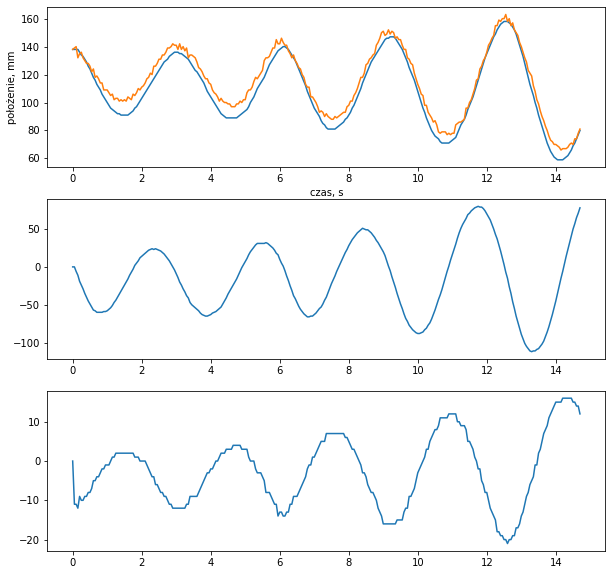

In [46]:
M = dsys.A-L*dsys.C
xe_d = np.zeros((N, 3))
xe_d[0] = [x[0], 0, 0]
tmp_t = np.zeros((N,3))
for i in range(N-1):
    xe = xe_d[i]
    xe_n = [0,0,0]
    
    tmp = 804*xe[0] + 50*xe[1] + 196*x[i];
    tmp_t[i][0] = tmp
    xe_n[0] = tmp//1000;
    
    tmp = -349*xe[0] + 1000*xe[1] + 487*xe[2] + 349*x[i];
    tmp_t[i][1] = tmp
    xe_n[1] = tmp//1000;
    
    tmp = 20*xe[2] + 980*u[i];
    tmp_t[i][2] = tmp
    xe_n[2] = tmp//1000;
    
    xe_d[i+1] = xe_n

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 1, 1)
plt.plot(t, xe_d[:,0])
plt.plot(t, x)
plt.xlabel("czas, s")
plt.ylabel("położenie, mm")
fig.add_subplot(3, 1, 2)
plt.plot(t, xe_d[:,1])
fig.add_subplot(3, 1, 3)
plt.plot(t, xe_d[:,2])

Text(0.5, 0, 'czas, s')

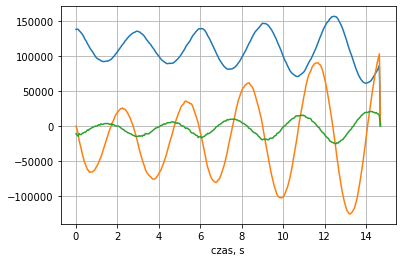

In [43]:
plt.plot(t, tmp_t)
plt.grid()
plt.xlabel("czas, s")

LQR

In [61]:
K, S, E = control.dlqr(dsys, [[100, 0, 0], [0, 10, 0], [0,0,1]], 1)
print(K)
print("-----")
print(np.abs(E))

[[3.94947392 1.84354802 0.81851853]]
-----
[0.0101185  0.35459954 0.85242066]
